## Visualizing and making assumptions on the 2020 predictions made from our models trained on the 2019 data sets

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [184]:
# Bringing in the predictions
lr_hitting_df = pd.read_csv('lr_hitting_predictions.csv', index_col='Player')
ridge_hitting_df = pd.read_csv('ridge_hitting_predictions.csv', index_col='Player')
pitching_df = pd.read_csv('pitching_predictions.csv', index_col='Player') 

In [ ]:
# LR Hitting
lr_hitting_df.head()

,Test Data,LR Predictions
Player,,
Marcus Semien,0.205,0.179911
Jose Abreu,0.276,0.247535
Jose Altuve,0.187,0.189176
Salvador Perez,0.311,0.274311
Ketel Marte,0.329,0.276391


In [ ]:
#Ridge Hitting
ridge_hitting_df.head()

,Test Data,Ridge Predictions
Player,,
Marcus Semien,0.205,0.178495
Jose Abreu,0.276,0.247483
Jose Altuve,0.187,0.187987
Salvador Perez,0.311,0.274020
Ketel Marte,0.329,0.272489


In [ ]:
# Pitching Preds
pitching_df.head()

,Real W,Predicted W
Player,,
Dylan Bundy,3,2.073079
Shane Bieber,3,2.587359
German Marquez,2,2.004976
Kyle Freeland,2,1.755144
Sonny Gray,3,1.903647


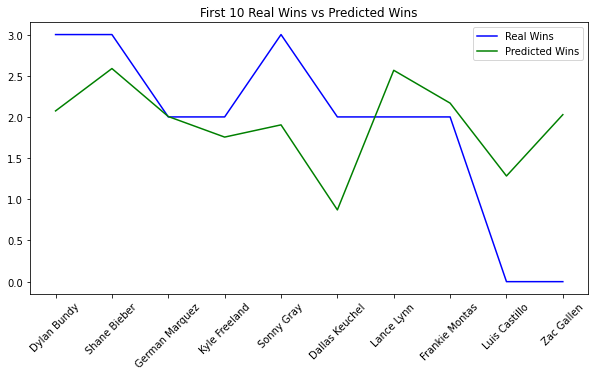

In [ ]:
# Plotting out accuracy of pitching predictions
plt.figure(figsize=(10,5))
plt.title("First 10 Real Wins vs Predicted Wins")
plt.plot(pitching_df.index[:10], pitching_df['Real W'][:10], color='b')
plt.plot(pitching_df.index[:10], pitching_df['Predicted W'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Real Wins', 'Predicted Wins'])
plt.show()

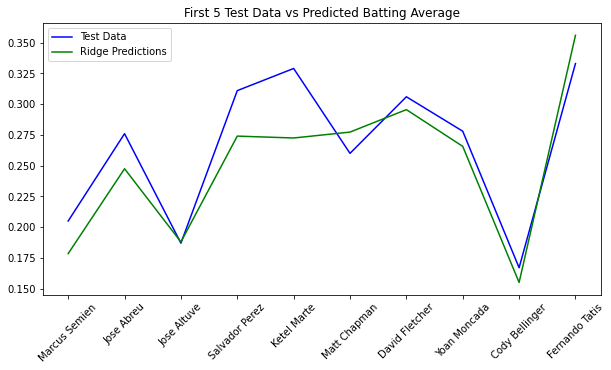

In [ ]:
# Plotting out Accuracy of RidgeRegressor Predictions for hitting
plt.figure(figsize=(10,5))
plt.title("First 5 Test Data vs Predicted Batting Average")
plt.plot(ridge_hitting_df.index[:10], ridge_hitting_df['Test Data'][:10], color='b')
plt.plot(ridge_hitting_df.index[:10], ridge_hitting_df['Ridge Predictions'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Test Data', 'Ridge Predictions'])
plt.show()

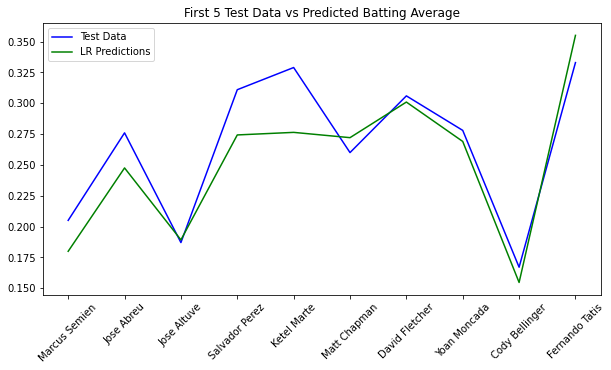

In [ ]:
# Plotting out Accuracy of LinearRegressor Predictions for hitting
plt.figure(figsize=(10,5))
plt.title("First 5 Test Data vs Predicted Batting Average")
plt.plot(lr_hitting_df.index[:10], lr_hitting_df['Test Data'][:10], color='b')
plt.plot(lr_hitting_df.index[:10], lr_hitting_df['LR Predictions'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Test Data', 'LR Predictions'])
plt.show()

In [185]:
# Calculate xBA based on total 2020 games and number of games played 
def calc_xba(ba):
  if ba < 1.0: 
    return (ba / 18) * 60 - ba * 2
  else:
    return ba

In [186]:
# Apply function from above
ridge_hitting_df['xBA'] = ridge_hitting_df['Ridge Predictions'].apply(calc_xba)

In [187]:
ridge_hitting_df.head()

,Test Data,Ridge Predictions,xBA
Player,,,
Marcus Semien,0.205,0.178495,0.237993
Jose Abreu,0.276,0.247483,0.329978
Jose Altuve,0.187,0.187987,0.250649
Salvador Perez,0.311,0.274020,0.365360
Ketel Marte,0.329,0.272489,0.363319


In [188]:
# Function to calculate Expected Pitcher Wins
def calc_xW(w): 
  if w != 0:
    return ((w / 18) * 60) * 2.25
  else:
    return 0

In [189]:
# Apply function from above
pitching_df['xW'] = pitching_df['Real W'].apply(calc_xW)

In [190]:
pitching_df.head()

,Real W,Predicted W,xW
Player,,,
Dylan Bundy,3,2.073079,22.5
Shane Bieber,3,2.587359,22.5
German Marquez,2,2.004976,15.0
Kyle Freeland,2,1.755144,15.0
Sonny Gray,3,1.903647,22.5


In [191]:
# Rename some columns
pitching_df = pitching_df.rename(columns={'Real W':'Current Wins', 'Predicted W':'Predicted Wins', 'xW':'Current Predicted Wins (EOS)'})
ridge_hitting_df = ridge_hitting_df.rename(columns={'Test Data':'Current BA', 'Ridge Predictions':'BA Prediction', 'xBA':'Expected BA (EOS)'})

In [192]:
ridge_hitting_df.head()

,Current BA,BA Prediction,Expected BA (EOS)
Player,,,
Marcus Semien,0.205,0.178495,0.237993
Jose Abreu,0.276,0.247483,0.329978
Jose Altuve,0.187,0.187987,0.250649
Salvador Perez,0.311,0.274020,0.365360
Ketel Marte,0.329,0.272489,0.363319


In [193]:
pitching_df.head()

,Current Wins,Predicted Wins,Current Predicted Wins (EOS)
Player,,,
Dylan Bundy,3,2.073079,22.5
Shane Bieber,3,2.587359,22.5
German Marquez,2,2.004976,15.0
Kyle Freeland,2,1.755144,15.0
Sonny Gray,3,1.903647,22.5


In [194]:
pitching_df = pitching_df[pitching_df['Current Wins'] != 0]

In [195]:
pitching_df.sort_values(by='Current Predicted Wins (EOS)', ascending=False)

,Current Wins,Predicted Wins,Current Predicted Wins (EOS)
Player,,,
Dylan Bundy,3,2.073079,22.5
Gerrit Cole,3,1.469992,22.5
Sonny Gray,3,1.903647,22.5
Randy Dobnak,3,1.221867,22.5
Antonio Senzatela,3,1.161674,22.5
...,...,...,...
Jake Arrieta,1,0.368114,7.5
Anthony DeSclafani,1,0.526762,7.5
Jordan Lyles,1,0.425078,7.5
